In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /gdrive/My Drive/ANN/Dataset

/gdrive/My Drive/ANN/Dataset


In [ ]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob

In [ ]:
seed = 21

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [ ]:
import warnings
import logging

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)
tf.get_logger().setLevel('INFO')
tf.autograph.set_verbosity(0)

tf.get_logger().setLevel(logging.ERROR)
tf.get_logger().setLevel('ERROR')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [ ]:
#!unzip cleaned_by_ALBERTO.zip

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

In [ ]:
#splitfolders.ratio("cleaned_by_ALBERTO", output = "splitted_cleaned_by_Alberto", seed = seed, ratio=(.8, .15, .05), group_prefix = None, move = False)

In [21]:
dataset_dir = 'splitted_dataset'
training_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

In [19]:
# Plot example images from dataset
labels = ['Species1',       # 0
          'Species2',       # 1
          'Species3',       # 2
          'Species4',       # 3
          'Species5',       # 4
          'Species6',       # 5
          'Species7',       # 6
          'Species8']       # 7

%cd splitted_dataset/train/

# Plot example images from dataset divided by labels (species)
num_rows = 7
num_cols = len(labels)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(28,18))
fig.tight_layout()

for col_idx, label in zip(range(num_cols), labels):
  axs[0][col_idx].set_title('{}'.format(label))
  for row_idx, filename in zip(range(num_rows), glob.glob('{}/*.jpg'.format(label))):
    img = Image.open(filename)
    axs[row_idx][col_idx].imshow(np.array(img))
    axs[row_idx][col_idx].set(xlabel='{}'.format(filename))
    #axs[row_idx][col_idx].axis('off')

Output hidden; open in https://colab.research.google.com to view.

In [23]:
%cd /gdrive/My Drive/ANN/Dataset

# Create an instance of ImageDataGenerator for training, validation, and test sets
train_data_gen = ImageDataGenerator()
valid_data_gen = ImageDataGenerator()
test_data_gen = ImageDataGenerator()

# Obtain a data generator with the 'ImageDataGenerator.flow_from_directory' method
train_gen = train_data_gen.flow_from_directory(directory=training_dir,
                                               target_size=(96,96),
                                               color_mode='rgb',
                                               classes=None, # can be set to labels
                                               class_mode='categorical',
                                               batch_size=32,
                                               shuffle=True,
                                               seed=seed)
valid_gen = valid_data_gen.flow_from_directory(directory=validation_dir,
                                               target_size=(96,96),
                                               color_mode='rgb',
                                               classes=None, # can be set to labels
                                               class_mode='categorical',
                                               batch_size=32,
                                               shuffle=True,
                                               seed=seed)
test_gen = test_data_gen.flow_from_directory(directory=test_dir,
                                              target_size=(96,96),
                                              color_mode='rgb',
                                              classes=None, # can be set to labels
                                              class_mode='categorical',
                                              batch_size=32,
                                              shuffle=True,
                                              seed=seed)

/gdrive/My Drive/ANN/Dataset
Found 2829 images belonging to 8 classes.
Found 527 images belonging to 8 classes.
Found 186 images belonging to 8 classes.


In [24]:
def get_next_batch(generator):
  batch = next(generator)

  image = batch[0]
  target = batch[1]

  print("(Input) image shape:", image.shape)
  print("Target shape:",target.shape)

  # Visualize only the first sample
  image = image[0]
  target = target[0]
  target_idx = np.argmax(target)
  print()
  print("Categorical label:", target)
  print("Label:", target_idx)
  print("Class name:", labels[target_idx])
  fig = plt.figure(figsize=(6, 4))
  plt.imshow(np.uint8(image))

  return batch

(Input) image shape: (32, 96, 96, 3)
Target shape: (32, 8)

Categorical label: [0. 0. 0. 1. 0. 0. 0. 0.]
Label: 3
Class name: Species4


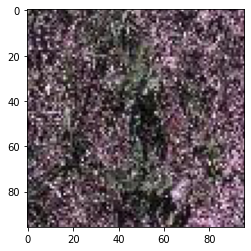

In [25]:
 #get a random image
_ = get_next_batch(train_gen)

Text(0.5, 1.0, 'Number of training images per category:')

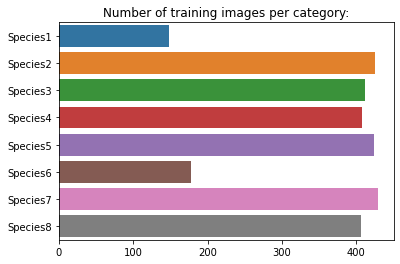

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
category_names = sorted(os.listdir(training_dir))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = training_dir + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of training images per category:")

Text(0.5, 1.0, 'Number of validation images per category:')

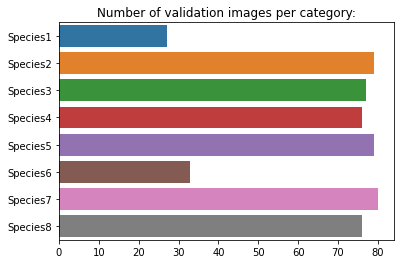

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
category_names = sorted(os.listdir(validation_dir))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = validation_dir + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of validation images per category:")

Text(0.5, 1.0, 'Number of validation images per category:')

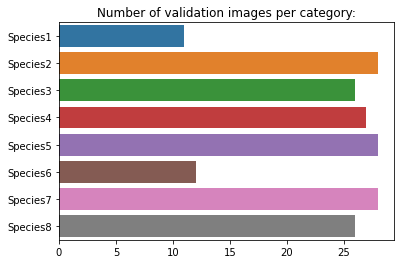

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
category_names = sorted(os.listdir(test_dir))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = test_dir + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of validation images per category:")

Rotation: {'theta': 132.7930092807499, 'tx': 0, 'ty': 0, 'shear': 0, 'zx': 1, 'zy': 1, 'flip_horizontal': 0, 'flip_vertical': 0, 'channel_shift_intensity': None, 'brightness': None} 

Width Shift: {'theta': 0, 'tx': 0, 'ty': 32, 'shear': 0, 'zx': 1, 'zy': 1, 'flip_horizontal': 0, 'flip_vertical': 0, 'channel_shift_intensity': None, 'brightness': None} 

Height Shift: {'theta': 0, 'tx': 46, 'ty': 0, 'shear': 0, 'zx': 1, 'zy': 1, 'flip_horizontal': 0, 'flip_vertical': 0, 'channel_shift_intensity': None, 'brightness': None} 

Zoom: {'theta': 0, 'tx': 0, 'ty': 0, 'shear': 0, 'zx': 0.9384129593070483, 'zy': 0.8077583769093687, 'flip_horizontal': 0, 'flip_vertical': 0, 'channel_shift_intensity': None, 'brightness': None} 

Horizontal Flip: {'theta': 0, 'tx': 0, 'ty': 0, 'shear': 0, 'zx': 1, 'zy': 1, 'flip_horizontal': 0, 'flip_vertical': 0, 'channel_shift_intensity': None, 'brightness': None} 

Vertical Flip: {'theta': 0, 'tx': 0, 'ty': 0, 'shear': 0, 'zx': 1, 'zy': 1, 'flip_horizontal': 0, 

Text(0.5, 1.0, 'Vertical Flipped')

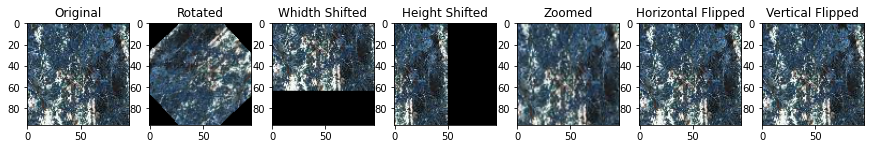

In [46]:
# Create some augmentation examples
# Get sample image
image = next(train_gen)[0][4]

# Create an instance of ImageDataGenerator for each transformation
rot_gen = ImageDataGenerator(rotation_range=180)
shift_gen = ImageDataGenerator(width_shift_range=80)
height_gen = ImageDataGenerator(height_shift_range=80)
zoom_gen = ImageDataGenerator(zoom_range=0.5)
flip_gen = ImageDataGenerator(horizontal_flip=True)
vertical_flip = ImageDataGenerator(vertical_flip=True)
fill_mode = ImageDataGenerator(fill_mode='constant')

# Get random transformations
rot_t = rot_gen.get_random_transform(img_shape=(96, 96))
print('Rotation:', rot_t, '\n')
shift_t = shift_gen.get_random_transform(img_shape=(96, 96))
print('Width Shift:', shift_t, '\n')
height_t = height_gen.get_random_transform(img_shape=(96, 96))
print('Height Shift:', height_t, '\n')
zoom_t = zoom_gen.get_random_transform(img_shape=(96, 96))
print('Zoom:', zoom_t, '\n')
flip_t = flip_gen.get_random_transform(img_shape=(96, 96))
print('Horizontal Flip:', flip_t, '\n')
vertical_t = vertical_flip.get_random_transform(img_shape=(96, 96))
print('Vertical Flip:', flip_t, '\n')


# Apply the transformation
gen = ImageDataGenerator(fill_mode='constant', cval=0.)
rotated = gen.apply_transform(image, rot_t)
whidth_shifted = gen.apply_transform(image, shift_t) 
height_shifted = gen.apply_transform(image, height_t) 
zoomed = gen.apply_transform(image, zoom_t) 
horizontal_flipped = gen.apply_transform(image, flip_t)  
vertical_flipped = gen.apply_transform(image, vertical_t)  

# Plot original and augmented images
fig, ax = plt.subplots(1, 7, figsize=(15, 45))
ax[0].imshow(np.uint8(image))
ax[0].set_title('Original')
ax[1].imshow(np.uint8(rotated))
ax[1].set_title('Rotated')
ax[2].imshow(np.uint8(whidth_shifted))
ax[2].set_title('Whidth Shifted')
ax[3].imshow(np.uint8(height_shifted))
ax[3].set_title('Height Shifted')
ax[4].imshow(np.uint8(zoomed))
ax[4].set_title('Zoomed')
ax[5].imshow(np.uint8(horizontal_flipped))
ax[5].set_title('Horizontal Flipped')
ax[6].imshow(np.uint8(vertical_flipped))
ax[6].set_title('Vertical Flipped')

Transform: {'theta': 28.551779691346326, 'tx': 13.067692193768611, 'ty': 11.0591154576048, 'shear': 0, 'zx': 1.1625087757167445, 'zy': 0.891248612897663, 'flip_horizontal': 0, 'flip_vertical': 0, 'channel_shift_intensity': None, 'brightness': None}


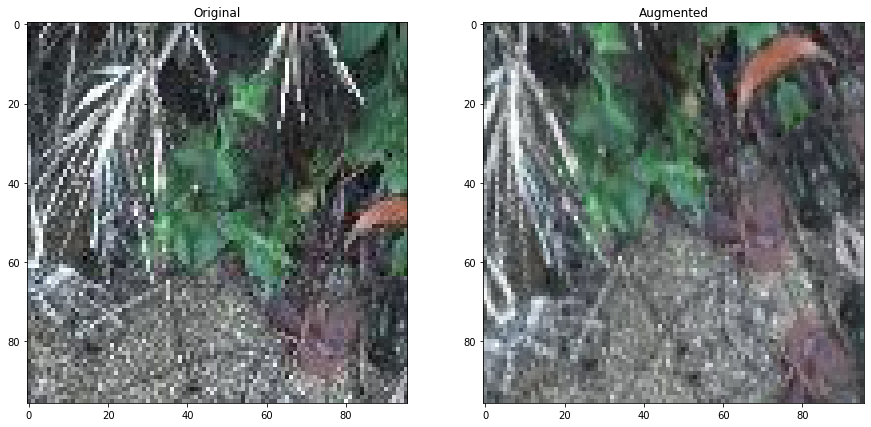

In [45]:
# Combine multiple transformations
image = next(train_gen)[0][4]
gen = ImageDataGenerator(rotation_range=180,
                         height_shift_range=0.4,
                         width_shift_range=0.4,
                         zoom_range=0.5,
                         horizontal_flip=True,
                         vertical_flip=True, 
                         fill_mode='reflect')

# Get random transformation
t = gen.get_random_transform(img_shape=(96, 96))
print("Transform:", t)

# Apply the transformation
augmented = gen.apply_transform(image, t)

# Plot original and augmented images
fig, ax = plt.subplots(1, 2, figsize=(15,30))
ax[0].imshow(np.uint8(image))
ax[0].set_title("Original")
ax[1].imshow(np.uint8(augmented))
ax[1].set_title("Augmented")
plt.show()